# 必要なライブラリのインポート

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error




In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 統計量調査

In [6]:
x=df_train["SalePrice"]

<AxesSubplot:>

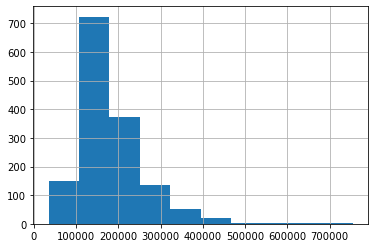

In [7]:
x.hist()

In [8]:
print("Skewness: %f" % x.skew())
print("Kurtosis: %f" % x.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# 相関係数

In [9]:
corr =df_train.corr()

In [10]:
k = 10 
#相関係数ベスト１０のカラム名を取得
cols = corr.nlargest(k,"SalePrice")["SalePrice"].index
#ベスト10の相関係数の算出、Tをつけることによって列と行を入れ替えている
cm = np.corrcoef(df_train[cols].values.T)

<AxesSubplot:>

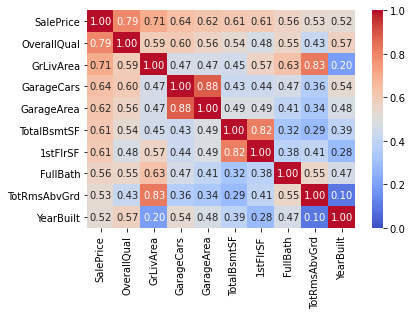

In [11]:
#相関係数の高いindexの表示
sns.heatmap(cm, cmap= sns.color_palette('coolwarm',100), annot=True,fmt='.2f', vmin = 0, vmax = 1,yticklabels=cols.values, xticklabels=cols.values)

In [12]:
#相関係数の高いindexのみ取得
train_data = df_train[['Id','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF']]

# 特徴量エンジニアリング

In [13]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test)

NameError: name 'x_train' is not defined

In [14]:
params = {'metric': 'rmse',
          'max_depth' : 9}

In [15]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50)

NameError: name 'lgb_train' is not defined

In [16]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=1000,
                early_stopping_rounds=100,
                verbose_eval=25)

NameError: name 'lgb_train' is not defined

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [18]:
predicted = gbm.predict(x_test)

NameError: name 'gbm' is not defined

In [19]:
predicted.shape

NameError: name 'predicted' is not defined

In [20]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

NameError: name 'y_test' is not defined

In [21]:
True_Pred_map(pred_df)

NameError: name 'pred_df' is not defined

In [22]:
lgb.plot_importance(gbm, height=0.5, figsize=(8,16))

NameError: name 'gbm' is not defined

In [23]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
df_test2 = df_test[['Id','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF']]

In [25]:
predicted = gbm.predict(df_test2)


NameError: name 'gbm' is not defined

In [26]:
predicted

NameError: name 'predicted' is not defined

In [27]:
df_test2["SalePrice"] = predicted

NameError: name 'predicted' is not defined

In [28]:
df_test2

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,1461,5,896,1.0,730.0,882.0
1,1462,6,1329,1.0,312.0,1329.0
2,1463,5,1629,2.0,482.0,928.0
3,1464,6,1604,2.0,470.0,926.0
4,1465,8,1280,2.0,506.0,1280.0
...,...,...,...,...,...,...
1454,2915,4,1092,0.0,0.0,546.0
1455,2916,4,1092,1.0,286.0,546.0
1456,2917,5,1224,2.0,576.0,1224.0
1457,2918,5,970,0.0,0.0,912.0


In [29]:
df_test2[["Id","SalePrice"]].head()

KeyError: "['SalePrice'] not in index"

In [30]:
df_test2[["Id","SalePrice"]].to_csv("submission3.csv",index=False)

KeyError: "['SalePrice'] not in index"

# GrLivArea	GarageCarsについて寄与率が高いので特徴量エンジニアリングをやってみる

In [31]:
train_data2 = df_train[['Id','OverallQual', 'GrLivArea','SalePrice']]

In [32]:
train_data2.isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
SalePrice      0
dtype: int64

/opt/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


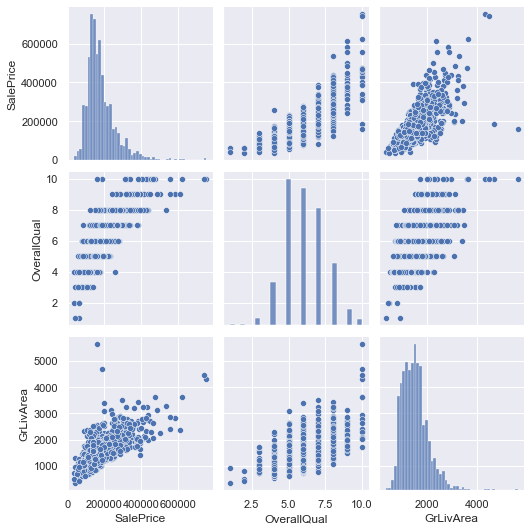

In [33]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea']
sns.pairplot(train_data2[cols], size = 2.5)
plt.show()

In [34]:
def outlier_iqr(train_data2):

    for i in range(len(train_data2.columns)):

        # 列を抽出する
        col = train_data2.iloc[:,i]

        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲

        # 外れ値の基準点
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return train_data2

In [35]:
train_data3=outlier_iqr(train_data2)

/opt/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/envs/python36/lib/python3.6/site-packages/i

/opt/anaconda3/envs/python36/lib/python3.6/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


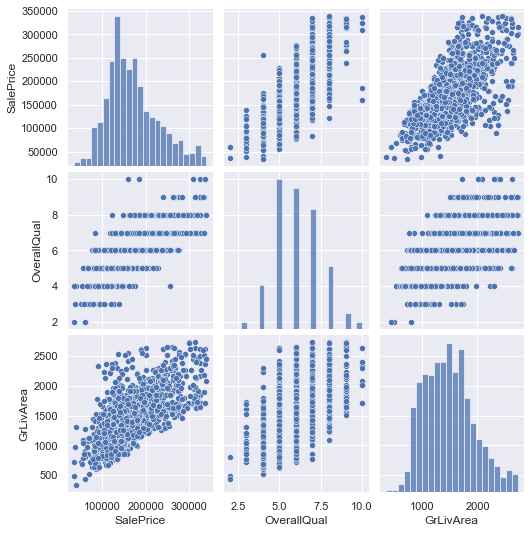

In [36]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea']
sns.pairplot(train_data3[cols], size = 2.5)
plt.show()

In [37]:
train_data3

,Id,OverallQual,GrLivArea,SalePrice
0,1,7.0,1710.0,208500.0
1,2,6.0,1262.0,181500.0
2,3,7.0,1786.0,223500.0
3,4,7.0,1717.0,140000.0
4,5,8.0,2198.0,250000.0
...,...,...,...,...
1455,1456,6.0,1647.0,175000.0
1456,1457,6.0,2073.0,210000.0
1457,1458,7.0,2340.0,266500.0
1458,1459,5.0,1078.0,142125.0


In [38]:
train_data3.isnull().sum()

Id              0
OverallQual     2
GrLivArea      31
SalePrice      61
dtype: int64

In [39]:
test_data2 = train_data3["SalePrice"]
train_data2 = train_data3[['Id','OverallQual', 'GrLivArea']]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(train_data2,test_data2 )

In [41]:
lgb_train2 = lgb.Dataset(x_train, y_train)
lgb_eval2 = lgb.Dataset(x_test, y_test)

In [80]:
params = {'metric': 'rmse',
          'max_depth' : 3}

In [81]:
gbm = lgb.train(params,
                lgb_train2,
                valid_sets=lgb_eval2,
                num_boost_round=100,
                early_stopping_rounds=100,
                verbose_eval=5)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 3
[LightGBM] [Info] Start training from score 163201.978995
Training until validation scores don't improve for 100 rounds
[5]	valid_0's rmse: 59278.8
[10]	valid_0's rmse: 57447.6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[15]	valid_0's rmse: 56857.7
[LightGBM] [Warning]

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [57]:
predicted = gbm.predict(x_test)

In [58]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']

In [74]:
pred_df=pred_df.dropna(how='any')

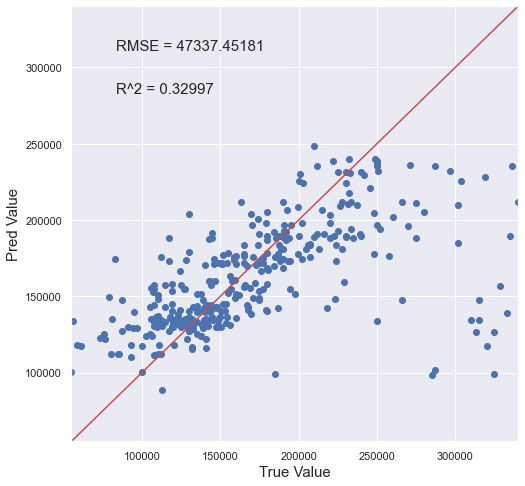

In [76]:
True_Pred_map(pred_df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

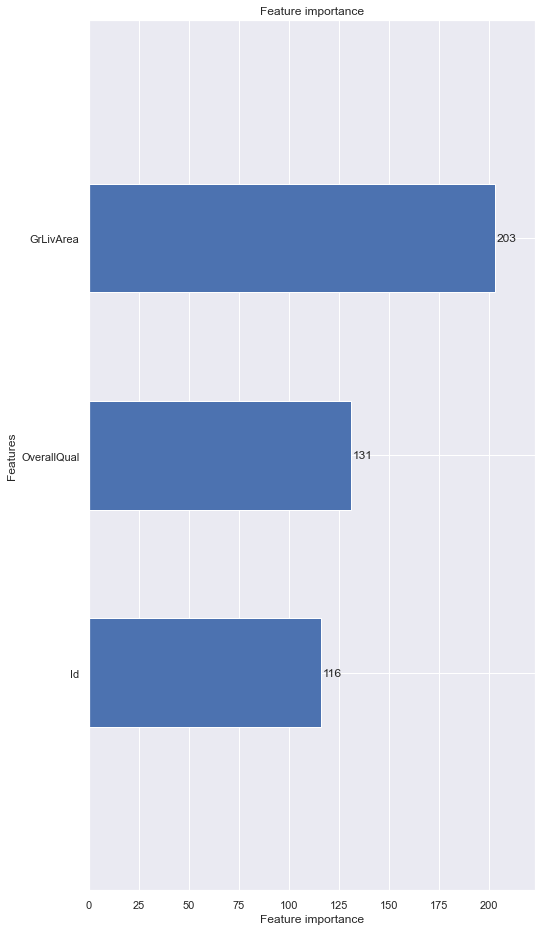

In [75]:
lgb.plot_importance(gbm, height=0.5, figsize=(8,16))

In [ ]:
True_Pred_map(pred_df)